In [1]:
# Mac を使っている方は、以下のパッケージが必要になる場合があります。
# !brew install cmake gcc 
# pipを使って、以下のパッケージをインストールしてください。
# !pip install u8darts

In [2]:
import pandas as pd
df = pd.read_csv("visitors.csv")
df.head()

,date,weather,temperature,visitors
0,2022-08-10,曇り,24.782648,32.421047
1,2022-08-11,曇り,22.804434,58.363670
2,2022-08-12,曇り,21.460733,61.722861
3,2022-08-13,曇り,23.352008,75.111831
4,2022-08-14,曇り,24.869970,39.960291


In [3]:
from darts.timeseries import TimeSeries
series = TimeSeries.from_dataframe(df, time_col="date", value_cols=["visitors"])

<Axes: xlabel='date'>

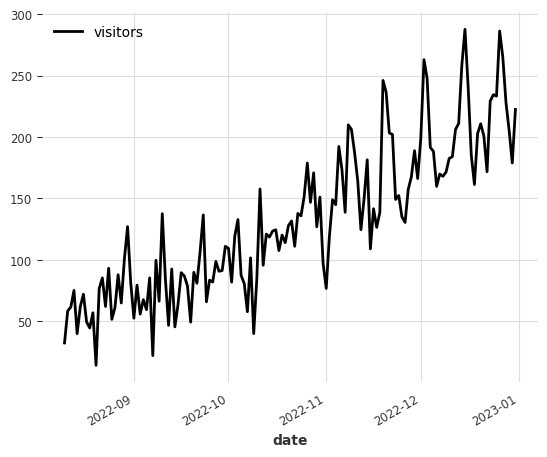

In [39]:
from darts.timeseries import TimeSeries
series = TimeSeries.from_dataframe(df, time_col="date", value_cols="visitors")
series.plot()

In [6]:
# 1. ExponentialSmoothingモデルクラスの読み込み
from darts.models import ExponentialSmoothing
# 2. モデルの学習
# seriesはデータ観察で読み込んであります
# モデルの初期化
model = ExponentialSmoothing()
model.fit(series)
# モデルの学習
model.fit(series)

ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=False, seasonal=SeasonalityMode.ADDITIVE, seasonal_periods=None, random_state=0)

In [8]:
prediction = model.predict(20)

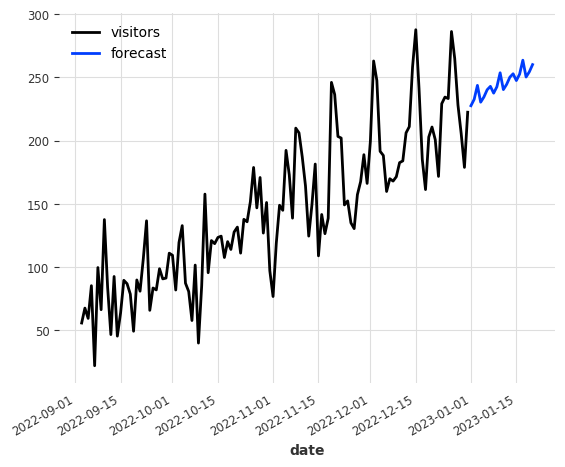

In [9]:
import matplotlib.pyplot as plt

series[-120:].plot()
prediction.plot(label="forecast")
plt.legend()

<Axes: xlabel='date'>

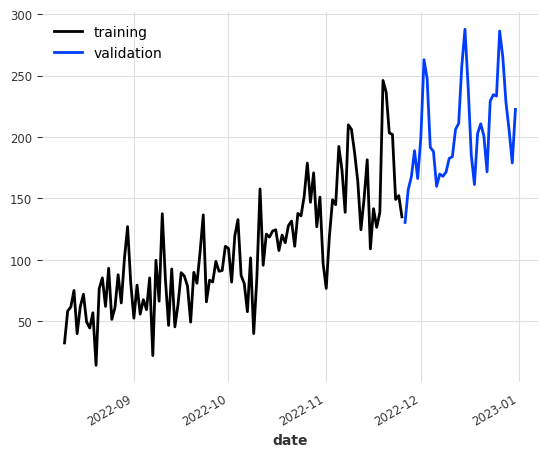

In [10]:
train, val =  series[:-36], series[-36:]
train.plot(label="training")
val.plot(label="validation")

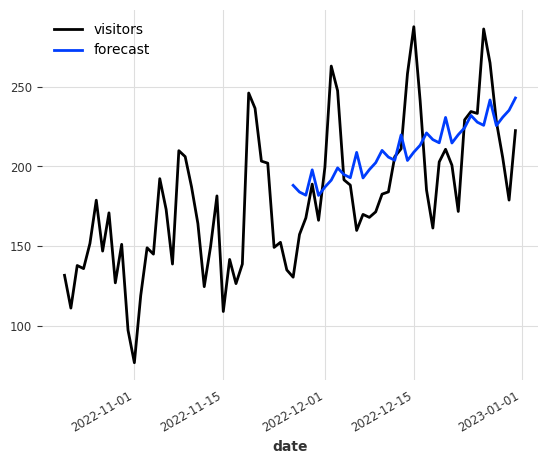

In [11]:
from darts.models import ExponentialSmoothing

model = ExponentialSmoothing()
model.fit(train)

prediction = model.predict(36)
series[-72:].plot()
prediction.plot(label="forecast")
plt.legend()

In [12]:
from darts.metrics.metrics import mape
mape(prediction, val)

13.37580991116675